In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
# Load the dataset
penguins_data = pd.read_csv('datasets/penguins.csv')

# Display 
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Gives us a count of missing values for each column
penguins_data.isnull().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [4]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
# Drop any row with missing values
penguins_data_cleaned = penguins_data.dropna()
penguins_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [6]:
# Print out main statistics about penguins dataset
print(penguins_data_cleaned.describe(include='all'))

       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex         year  
count    333.000000   333   333.000000  
uniqu

In [7]:
# Identify columns with data type 'object'
string_columns = penguins_data_cleaned.select_dtypes(include=['object']).columns

print(string_columns)

Index(['species', 'island', 'sex'], dtype='object')


In [8]:
# Convert these columns to 'category' data type
for column in string_columns:
    penguins_data_cleaned[column] = penguins_data_cleaned[column].astype('category')
    
penguins_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
 7   year               333 non-null    int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 17.0 KB


C:\Users\saaso\AppData\Local\Temp\ipykernel_42776\368704870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_data_cleaned[column] = penguins_data_cleaned[column].astype('category')
C:\Users\saaso\AppData\Local\Temp\ipykernel_42776\368704870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_data_cleaned[column] = penguins_data_cleaned[column].astype('category')
C:\Users\saaso\AppData\Local\Temp\ipykernel_42776\368704870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [9]:
# Apply min-max scaling for non-categorical columns
for feature in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    min_value = penguins_data_cleaned[feature].min()
    max_value = penguins_data_cleaned[feature].max()
    penguins_data_cleaned[feature] = (penguins_data_cleaned[feature] - min_value) / (max_value - min_value)
    
print(penguins_data_cleaned.describe(include='all'))

       species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN        0.432465       0.483912           0.490966   
std        NaN     NaN        0.198861       0.234433           0.237555   
min        NaN     NaN        0.000000       0.000000           0.000000   
25%        NaN     NaN        0.269091       0.297619           0.305085   
50%        NaN     NaN        0.450909       0.500000           0.423729   
75%        NaN     NaN        0.600000       0.666667           0.694915   
max        NaN     NaN        1.000000       1.000000           1.000000   

        body_mass_g   sex         year  
count    333.000000   333   333.000000  
uniqu

C:\Users\saaso\AppData\Local\Temp\ipykernel_42776\1625737095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_data_cleaned[feature] = (penguins_data_cleaned[feature] - min_value) / (max_value - min_value)


In [10]:
# Create the target vector y
y = (penguins_data_cleaned['sex'] == 'male').astype(int)

# Create the input matrix X
X = penguins_data_cleaned.drop('sex', axis=1)

print(X.shape, y.shape)

(333, 7) (333,)


In [11]:
# Manually split the data into training and test sets (80% training, 20% testing)

# Shuffle the indices
np.random.seed(69) # Seed for reproducibility
shuffled_indices = np.random.permutation(len(X))

# Define the size of the training set (80% of data)
train_size = int(0.8 * len(X))

# Split the indices
train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]

# Split the data
X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

# Encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=['species','island','year'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['species','island','year'], drop_first=True)

# Add bias term (column of ones) to the input features
X_train_bias = np.c_[np.ones((X_train_encoded.shape[0], 1)), X_train_encoded]
X_test_bias = np.c_[np.ones((X_test_encoded.shape[0], 1)), X_test_encoded]

# Convert y_train and y_test to np arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(X_train_bias.shape, y_train.shape, X_test_bias.shape, y_test.shape)

(266, 11) (266,) (67, 11) (67,)


In [12]:
# Logistic regression

class LogitRegression:
    
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.loss = []    
    
    def fit(self, X, y):
        self.weights = np.random.uniform(0, 1, size=X.shape[1])
        for i in range(self.num_iterations):
            cost_value = self.cost(X, y)
            self.loss.append(cost_value)
            self.gradient_descent(X, y)
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, X, y):
        linear_combination = X.dot(self.weights)
        linear_combination = linear_combination.astype(float)
        cost_value = np.sum(-y * linear_combination + np.log(1 + np.exp(linear_combination)))
        return cost_value
    
    def gradient_descent(self, X, y):
        linear_combination = X.dot(self.weights)
        linear_combination = linear_combination.astype(float)
        predictions = self.sigmoid(linear_combination)
        gradient = X.T.dot(predictions - y)
        gradient = gradient.astype(float)
        self.weights -= self.learning_rate * gradient
        
    def predict(self, X):
        linear_combination = X.dot(self.weights)
        linear_combination = linear_combination.astype(float)
        predictions = self.sigmoid(linear_combination)
        return np.where(predictions >= 0.5, 1, 0)

In [23]:
# Train and fit model
model = LogitRegression(learning_rate=0.000001, num_iterations=100000)
model.fit(X_train_bias, y_train)

y_pred = model.predict(X_test_bias)

correct_predictions = np.sum(y_pred == y_test)
accuracy = correct_predictions / len(y_test)
trained_weights = model.weights
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Loss values over iterations:", model.loss)
print("Weight vector: ", trained_weights)

Accuracy: 76.12%
Loss values over iterations: [375.6971877854751, 375.6670501318493, 375.636914498432, 375.60678088554096, 375.57664929349414, 375.5465197226095, 375.5163921732048, 375.4862666455979, 375.45614314010675, 375.4260216570492, 375.395902196743, 375.36578475950614, 375.33566934565624, 375.30555595551135, 375.2754445893892, 375.2453352476075, 375.2152279304843, 375.1851226383371, 375.15501937148383, 375.1249181302423, 375.0948189149302, 375.0647217258654, 375.0346265633655, 375.00453342774847, 374.97444231933184, 374.9443532384334, 374.91426618537093, 374.8841811604621, 374.85409816402466, 374.8240171963763, 374.7939382578347, 374.76386134871757, 374.7337864693425, 374.7037136200273, 374.6736428010895, 374.64357401284684, 374.6135072556169, 374.58344252971744, 374.5533798354659, 374.5233191731801, 374.4932605431775, 374.4632039457758, 374.4331493812924, 374.4030968500452, 374.37304635235165, 374.3429978885292, 374.31295145889555, 374.28290706376816, 374.2528647034647, 374.222

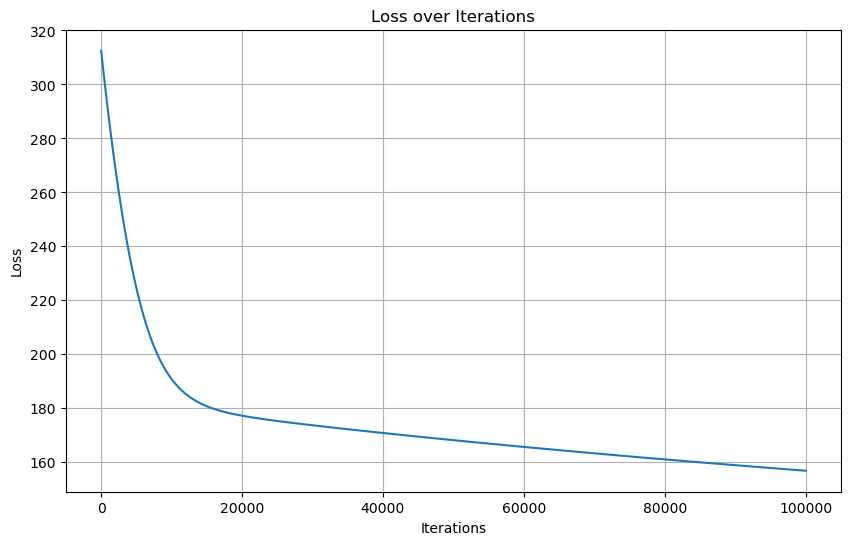

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(model.loss)
plt.title('Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()